# Library Installation

In [1]:
!pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

**1️⃣ Dropout**
* Randomly drops neurons during training, preventing co-adaptation.
* Reduces overfitting by ensuring the model does not rely too much on specific neurons.
  
**2️⃣ L2 Regularization (Weight Decay)**
* Adds a penalty term to the loss function, reducing large weight values.
* Helps prevent overfitting.

**3️⃣ Batch Normalization**
* Normalizes activations within mini-batches.
* Reduces internal covariate shift, speeding up training.

# CNN with Regularization

In [4]:
from google.colab import files
files.upload()  # upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yaswanthkancharla","key":"743b06db12fc339b072c8230b4a5e855"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kutaykutlu/drowsiness-detection

Dataset URL: https://www.kaggle.com/datasets/kutaykutlu/drowsiness-detection
License(s): unknown


In [7]:
!unzip drowsiness-detection.zip -d drowsiness_dataset

Streaming output truncated to the last 5000 lines.
  inflating: drowsiness_dataset/open_eye/s0024_00466_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00467_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00468_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00469_0_1_1_2_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00470_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00471_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00472_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00473_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00474_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00475_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00476_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00477_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00478_0_1_1_0_0_01.png  
  inflating: 

In [8]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

dataset_path = "drowsiness_dataset"
categories = ["closed_eye", "open_eye"]  # match the extracted folder names exactly

data = []
labels = []

img_size = 64  # Resize all images to 64x64

# Load and preprocess
for category in categories:
    path = os.path.join(dataset_path, category)
    class_num = categories.index(category)

    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            print("Error loading image:", e)

# Convert and normalize
data = np.array(data).reshape(-1, img_size, img_size, 1) / 255.0
labels = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels)

In [9]:
def create_model():
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten Layer
        Flatten(),

        # Fully Connected Layer with Dropout
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),  # 50% dropout
        BatchNormalization(),

        # Output Layer
        Dense(2, activation='softmax')  # Binary Classification (Open_Eyes, Closed_Eyes)
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Generate Random Fake Data for Testing
X_train = np.random.rand(500, 64, 64, 3)  # 500 images, 64x64 size, 3 channels
y_train = keras.utils.to_categorical(np.random.randint(2, size=(500, 1)), num_classes=2)

# Create Model
model = create_model()

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - accuracy: 0.5220 - loss: 3.9207 - val_accuracy: 0.5700 - val_loss: 3.3240
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.6251 - loss: 3.1976 - val_accuracy: 0.5700 - val_loss: 2.9149
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.7754 - loss: 2.5964 - val_accuracy: 0.5700 - val_loss: 3.2488
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.8892 - loss: 2.1576 - val_accuracy: 0.5700 - val_loss: 4.5068
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.9618 - loss: 1.7918 - val_accuracy: 0.5700 - val_loss: 5.5150
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.9960 - loss: 1.4942 - val_accuracy: 0.5700 - val_loss: 5.4188
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.9974 - loss: 1.2952 - val_accuracy: 0.5700 - val_loss: 5.6874
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.9961 - loss: 1.1332 - val_accuracy: 0.

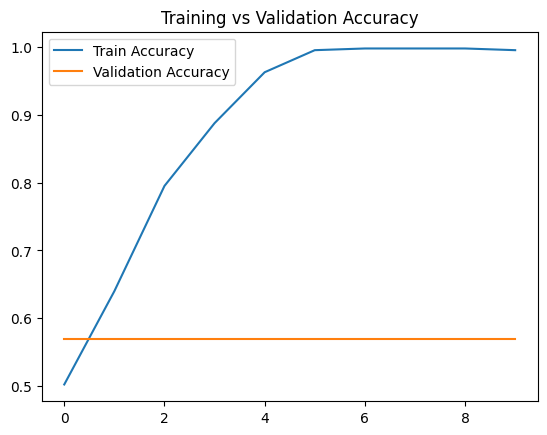

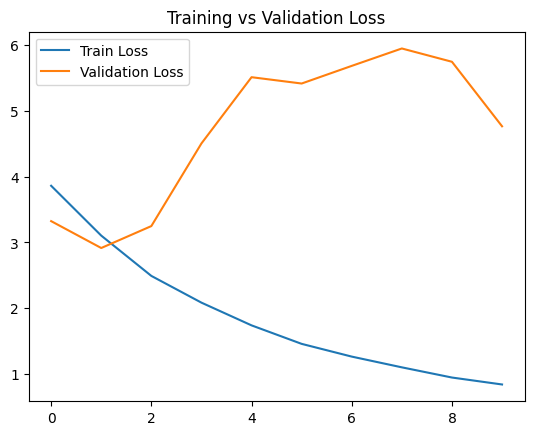

In [11]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()